In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#check how many N/A values
print(df_train.isna().sum()[df_train.isna().sum() > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_15204\271637079.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df_train["SalePrice"], shade = True, color = 'green')


<Axes: xlabel='SalePrice', ylabel='Density'>

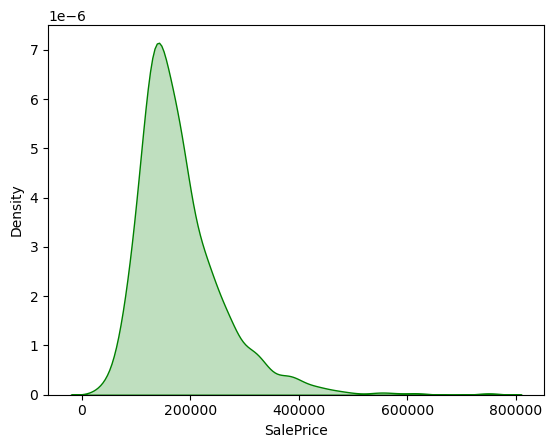

In [8]:
sns.kdeplot(data = df_train["SalePrice"], shade = True, color = 'green')

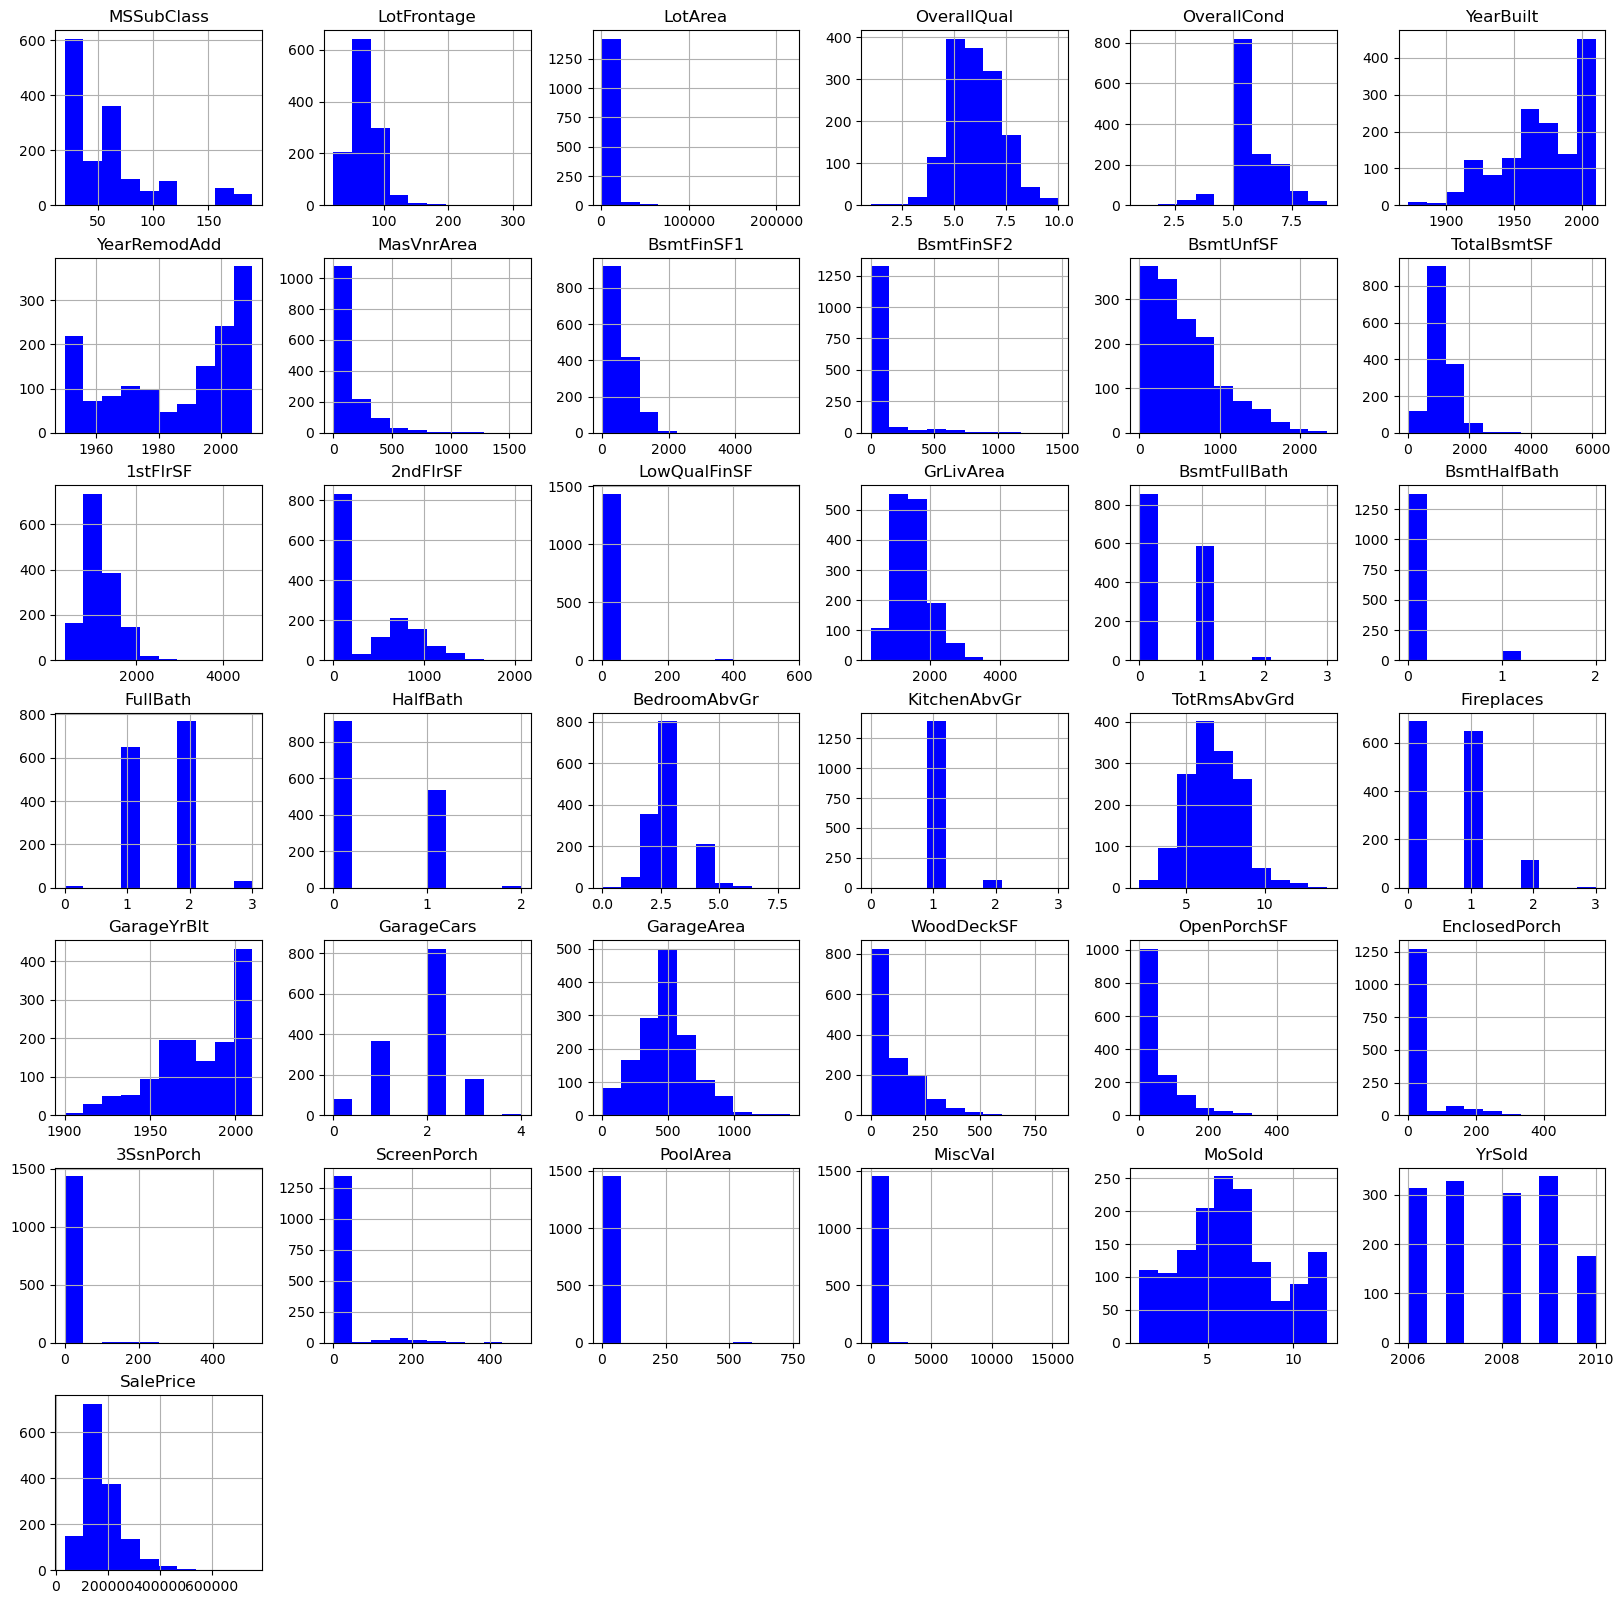

In [11]:
df_train.drop(columns=['Id']).hist(figsize=(20,20),xlabelsize=10, ylabelsize=10, color='blue')
plt.show()

<Figure size 1500x500 with 0 Axes>

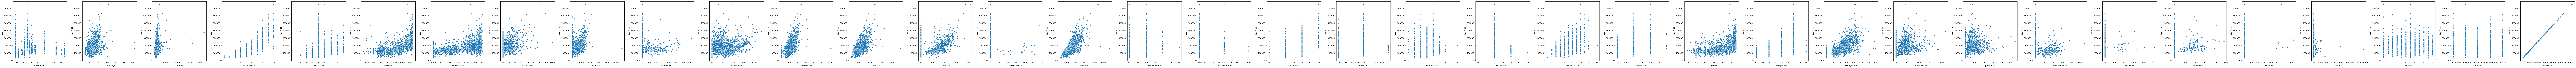

In [13]:
numerical_columns_train = df_train.select_dtypes(exclude=['object']).columns.tolist()
numerical_columns_train.remove("Id")

plt.figure(figsize=(15, 5))

num_plots = len(numerical_columns_train)
rows = 1
cols = num_plots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))

for i, column in enumerate(numerical_columns_train):
    sns.scatterplot(x=df_train[column], y=df_train["SalePrice"], ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("SalePrice")
plt.tight_layout()
plt.show()

<Axes: >

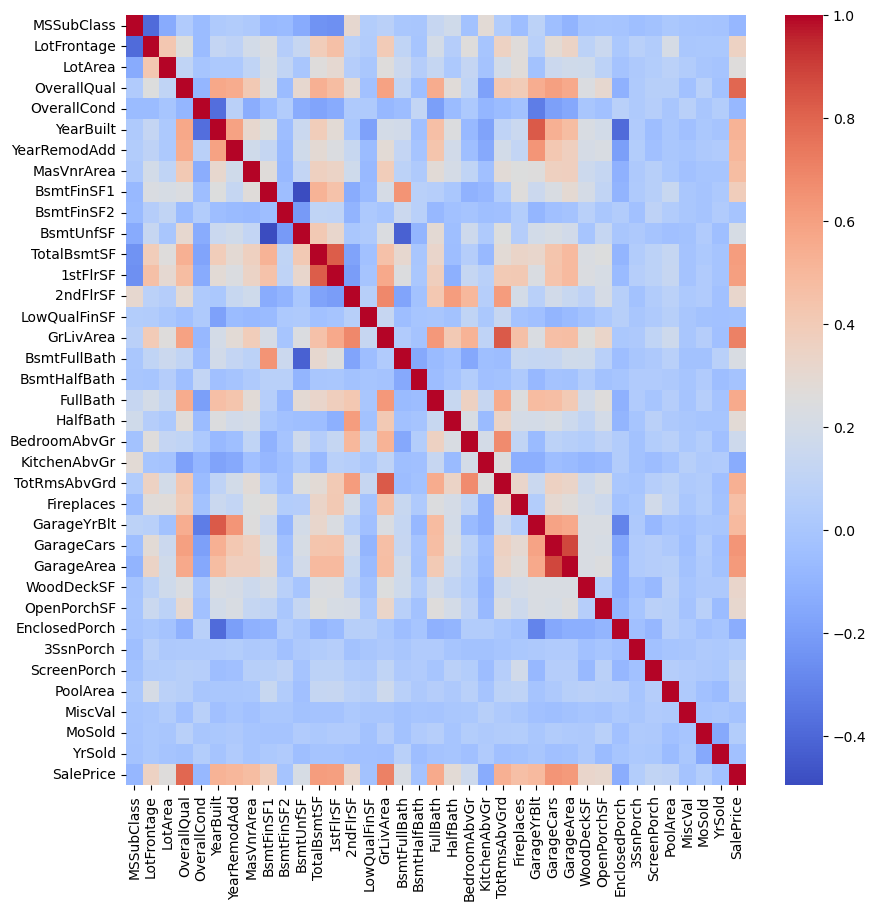

In [15]:
#check the correlation
plt.figure(figsize = (10,10))
sns.heatmap(data = df_train[numerical_columns_train].corr(), annot = False, cmap = 'coolwarm' )

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

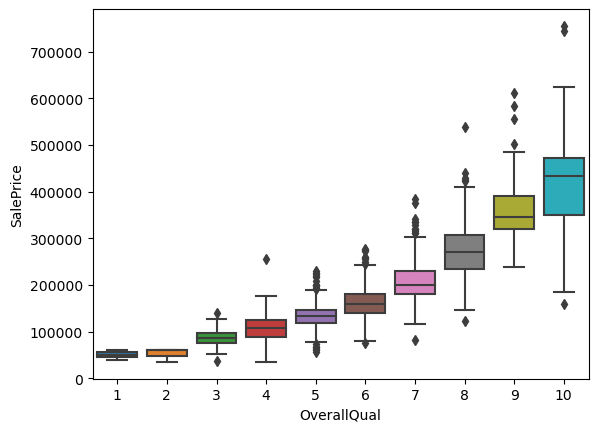

In [16]:
#draw a plot
sns.boxplot(x=df_train['OverallQual'], y=df_train['SalePrice'])

In [18]:
#Data preprocessing
data = pd.concat([df_train, df_test])
data.fillna(0, inplace=True)

In [19]:
data.drop('Id',axis=1, inplace=True)
column_to_drop = ['GarageArea','2ndFlrSF','GarageYrBlt','TotRmsAbvGrd']
data.drop(column_to_drop, axis=1, inplace=True)

In [20]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,0.0
1455,160,RM,21.0,1894,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,0.0
1456,20,RL,160.0,20000,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,0.0
1457,85,RL,62.0,10441,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,MnPrv,Shed,700,7,2006,WD,Normal,0.0


In [21]:
data['YearBuilt'] = data['YearBuilt'].apply(lambda x: np.log(x))
data['LotArea'] = data['LotArea'].apply(lambda x: np.log(x))

In [22]:
categrocial_features = data.select_dtypes(include = ["object"]).columns
numerical_features = data.select_dtypes(exclude=["object"]).columns.tolist()
numerical_features.remove('SalePrice')

y = df_train["SalePrice"]
X = pd.get_dummies(data.drop("SalePrice", axis = 1))

In [23]:
#encoding data
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [24]:
y = y.apply(lambda x : np.log(x))
y = y.values.reshape(-1, 1)
y = scaler.fit_transform(y)

y= pd.DataFrame(y, columns=['SalePrice'])
y

,SalePrice
0,0.560068
1,0.212764
2,0.734046
3,-0.437382
4,1.014651
...,...
1455,0.121434
1456,0.578020
1457,1.174708
1458,-0.399656


In [26]:
X_t = X.iloc[:len(df_train), :]
X_test = X.iloc[len(df_train):, :]
X_train, X_val ,y_train,y_val = train_test_split(X_t, y, test_size=0.01, random_state=42)

In [27]:
from sklearn.model_selection import cross_val_score

param = {
    'max_depth': 4,            
    'objective': 'reg:squarederror',  
    'learning_rate': 0.1,   
    'n_estimators': 300,       
    'subsample': 0.79,          
    'colsample_bytree': 0.8,    
    'eval_metric': 'rmse'       
}


model = XGBRegressor(**param)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print("Mean squarred error on validation set:", mse)

Mean squarred error on validation set: 0.04834755870254029


In [29]:
y_test = model.predict(X_test)
y_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_sub = pd.DataFrame({'SalePrice': np.exp(y_unscaled).flatten()})
submission = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_sub["SalePrice"] })
submission.to_csv('submission.csv', index=False)